## 폰트

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/

In [3]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

## 라이브러리 호출

In [4]:
# 연산 처리  패키지
import pandas as pd
import numpy as np

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 통계분석 패키지
import statsmodels.api as sm

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

#### 버전 확인

In [5]:
!python --version

Python 3.10.12


In [6]:
# !wget https://www.python.org/ftp/python/3.9.0/Python-3.9.0.tgz
# !tar xvfz Python-3.9.0.tgz
# !Python-3.9.0/configure
# !make
# !sudo make install

In [7]:
!python --version

Python 3.10.12


In [8]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [9]:
print(np.__version__)

1.25.2


In [10]:
# !pip install numpy==1.20.3

In [11]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

## Data 불러오기

In [12]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# 데이터 읽어오기
df1 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_1.csv", encoding = "cp949", engine='python')
df2 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_2.csv", encoding = "cp949", engine='python')
df3 = pd.read_csv("/content/drive/MyDrive/Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_3.csv", encoding = "cp949", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# 데이터 이상 없는 df의 column 확인
col = df2.columns

# 오류로 생성된 column 삭제
df1 = df1[col]

# df1의 파일상 null 행 삭제
null_idx = df1[df1["차종"].isnull()].index.tolist()
df1 = df1.drop(index = null_idx)

df1

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105812,A10,40.0,1.0,1.0,D,5년이하,중형,4.0,기명피보험자1인한정,6.0,5천만원이하,미가입,미가입,1,0.0
105813,A10,40.0,1.0,1.0,D,10년이상,소형A,3.0,부부한정,2.0,5천만원이하,미가입,15000K,2,0.0
105814,A10,40.0,1.0,1.0,D,10년이하,대형,3.0,부부한정,2.0,5천만원이하,가입,15000K,2,0.0
105815,A10,40.0,1.0,1.0,D,10년이상,중형,3.0,부부한정,7.0,5천만원이하,미가입,15000K,18,3.0


In [14]:
# 데이터 프레임 합치기
df = pd.concat([df1, df2, df3], ignore_index = True)
df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,A10,40.0,2.0,1.0,C,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,A10,40.0,2.0,1.0,C,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,A10,40.0,2.0,1.0,C,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,A10,40.0,2.0,1.0,C,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [15]:
# 수치형인데 object인 column 형변환
df['YUHO'] = df['YUHO'].str.replace(',', '').astype(int)
df['SAGO'] = df['SAGO'].apply(lambda x: int(float(str(x).replace(',', '').split('.')[0])))
df['SAGO'] = df['SAGO'].replace(',', '').astype(int)

# column명 한글로 변환
df = df.rename(columns = {"ZINSRDAVL": "연령대", "ZIOSEXCD": "성별",
                        "ZDPRODSCD": "국산차량여부", "NCR": "직전3년간사고건수",
                        "ZCARPSGVL": "차량경과년수", "ZDRVLISCD___T": "운전자한정특별약관",
                        "ZENTCARCD": "가입경력코드", "ZCARISDAM": "차량가입금액",
                        "ZIMAGERVL": "영상기록장치특약가입", "YUHO": "유효대수",
                        "SAGO" : "사고건수"})

# 사용하지 않는 column drop
df = df.drop(columns = ['ZCPRLCLCD', 'ZDRVLISCD'])
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수,사고건수
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [16]:
# 사고율 / 사고유무 df 생성
df['사고율'] = df.apply(lambda row: 0 if row['유효대수'] == 0 else row['사고건수'] / row['유효대수'], axis = 1)
df['사고유무'] = df.apply(lambda row: 0 if row['사고건수'] == 0 else 1, axis = 1)
df_per = df.drop(columns = ['사고유무','사고건수', '유효대수'])
df_yn = df.drop(columns = ['사고율','사고건수', '유효대수'])

In [17]:
df_per.head(5)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,사고율
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,0.0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,0.0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,3.0
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0.0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0.0


## Model 함수 정의

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score
import math

#### 모델 함수

In [19]:
# 로지스틱 회귀 함수
def logistic_classifier(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = LogisticRegression()


    # 모델 학습
    model.fit(X_train, y_train)


    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출


    # 평가지표
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    # 최적 threshold 값 & 그 때의 FPR 출력
    fper, tper, thresholds = roc_curve(y_test, y_proba)  # thresholds 별 fpr tpr 계산
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    optimal_fpr = fper[optimal_idx]                      # 해당 index에 위치한 fpr값 저장
    optimal_threshold = thresholds[optimal_idx]

    # 최적 threshold로 진행할 때의 평가지표
    # y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)
    # accuracy = accuracy_score(y_test, y_optpred)
    # precision = precision_score(y_test, y_optpred)
    # recall = recall_score(y_test, y_optpred)
    # f1 = f1_score(y_test, y_optpred, average='weighted')



    return [accuracy, precision, recall, f1, auc, optimal_fpr]



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

def random_forest_classifier(X_train, X_test, y_train, y_test):

    # 랜덤 포레스트 초기화
    model = RandomForestClassifier()  # 트리 개수는 100으로 설정

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1].reshape(-1, 1)  # 양성 클래스에 대한 확률 추출


    feature_names = X_train.columns.tolist()

    # 피처 중요도 추출
    feature_importance = model.feature_importances_

    feature_importance_result = ""
    for i, importance in enumerate(feature_importance):
        feature_importance_result += f"""Feature '{feature_names[i]}': {importance}
        """


    # 평가지표 출력
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
    auc = roc_auc_score(y_test, y_proba)

    return accuracy, report, f1, auc, feature_importance_result


### 시각화 함수

In [21]:
# ROC 커브 그리는 함수
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

In [22]:
# 혼동행렬 시각화
def plot_counfusion_matrix(y_test, y_proba, thereshhold) :

    con_max = confusion_matrix(y_true = y_test,
                               y_pred=(y_proba > thereshhold),
                               labels=[1, 0])
                           # labels=[1, 0] 넣은 이유 :
                           # 0 = Negative, 1 = Positive를 의미하므로
                           # label을 설정하지 않으면 Positive와 Negative가 바뀐 채로 나옴

    sns.heatmap(con_max,
                xticklabels= ['positive','Negative'],
                yticklabels=['True','False'],
                annot=True,
                cbar=False,
                cmap='Blues',
                fmt='g',
                annot_kws={'size':7})
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    plt.show()

In [23]:
# 로지스틱 회귀 시각화
def logistic_visual(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = LogisticRegression()


    # 모델 학습
    model.fit(X_train, y_train)


    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출


    # ROC CURVE 그리기
    print("=============================  ROC CURVE  ====================================\n")
    fper, tper, thresholds = roc_curve(y_test, y_proba)
    plot_roc_curve(fper, tper)
    auc = roc_auc_score(y_test, y_proba)
    print(f"auc : {auc} \n\n")


    # 혼동행렬 출력
    print("================================ MODEL 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, 0.5) # LogisticRegression의 임계값 defalut = 0.5, 모델 튜닝으로 임계값 재설정 불가한듯

    # 평가지표
    print(f"accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"precision : {precision_score(y_test, y_pred)}")
    print(f"recall : {recall_score(y_test, y_pred)}")
    print(f"f1-score : {f1_score(y_test, y_pred, average='weighted')}")

    # 최적 threshold 값 & 그 때의 FPR 출력
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    print('Optimal threshold:', thresholds[optimal_idx] , '\nOptimal FPR:', fper[optimal_idx], '\n\n')


    # 최적 threshold로 진행할 때의 평가지표
    print("================================ 최적 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, thresholds[optimal_idx])

    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    print(f"accuracy : {accuracy_score(y_test, y_optpred)}")
    print(f"precision : {precision_score(y_test, y_optpred)}")
    print(f"recall : {recall_score(y_test, y_optpred)}")
    print(f"f1-score : {f1_score(y_test, y_optpred, average='weighted')}")
    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    return model

## 전처리 전 Control - 은아

### 데이터셋 생성

In [24]:
# x, y 분리
yn_X = df_yn.drop(columns = ["사고유무"])
yn_y = df_yn["사고유무"]

#### One-Hot encoding

In [25]:
# One-Hot encoding 위해 수치형 변수를 문자로 변경

numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
numeric_col = yn_X.columns[numeric].tolist()

for col_name in numeric_col:
  yn_X[col_name] = yn_X[col_name].astype(str)


# One-Hot Encoding

yn_dummy_X = pd.get_dummies(yn_X, dummy_na = True, drop_first = True)


# 계산을 위해 boolean 타입을 int로 변경

for col_name in yn_dummy_X.columns:
    yn_dummy_X[col_name] = yn_dummy_X[col_name].astype(int)

#### Label Encoding (라이브러리)

In [26]:
# Label Encoding

yn_label_X = yn_X.copy()

le = LabelEncoder()

for col_name in yn_label_X.columns:
    le = LabelEncoder()
    le = le.fit(yn_label_X[col_name])
    yn_label_X[col_name] = le.transform(yn_label_X[col_name])

#### Label Encoding (수동 순서 반영)

In [27]:
yn_orderlabel_X = yn_X.copy()

# 연령대 수치로 그대로 사용
yn_orderlabel_X['연령대'] = yn_orderlabel_X['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0]))

# 남자는 1, 여자는 0
yn_orderlabel_X['성별'] = yn_orderlabel_X['성별'].apply(lambda x: 1 if int(str(x).replace('.','').split('.')[0]) == 2 else 0)

# 국산은 1, 외제는 0, 결측치는 1
yn_orderlabel_X['국산차량여부'] = yn_orderlabel_X['국산차량여부'].apply(lambda x: 1 if str(x) == "nan" else (0 if int(str(x).replace('.','').split('.')[0]) == 2 else 1))

# 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4')))

# 차량 경과년수 길 수록 큰 값 배정
yn_orderlabel_X['차량경과년수'] = yn_orderlabel_X['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3')))

# 차종 배기량 순으로 클 수록 큰 값 배정
yn_orderlabel_X['차종'] = yn_orderlabel_X['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6')))

# 가입경력코드 int로 바꿔 그대로 사용 (7년 이상 : 8)
yn_orderlabel_X['가입경력코드'] = yn_orderlabel_X['가입경력코드'].apply(lambda x: int(str(x).split('.')[0]))

# 차량가입금액 미가입은 0, 이후 금액 클 수록 큰 값 배정
yn_orderlabel_X['차량가입금액'] = yn_orderlabel_X['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3')))

# 영상기록장치 특약 가입 1, 미가입 0
yn_orderlabel_X['영상기록장치특약가입'] = yn_orderlabel_X['영상기록장치특약가입'].apply(lambda x : 1 if str(x)=='가입' else 0)

# 마일리지 약정거리 미가입이 가장 주행거리가 길 것이라 예상, 거리 순으로 값 배정 후 미가입 6 배정
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3')))

yn_orderlabel_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,1,4,0,6,가족및형제자매한정,8,1,1,5
1,0,0,1,1,0,6,기명피보험자1인한정,8,0,0,5
2,0,0,1,1,0,6,가족한정(형제자매제외),5,1,1,6
3,0,0,1,1,3,2,가족한정(형제자매제외),2,1,0,5
4,0,0,1,0,1,5,가족한정(형제자매제외),1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
267772,40,0,1,3,3,2,누구나(기본),8,0,0,2
267773,40,0,1,3,1,0,부부 및 자녀한정,8,1,1,5
267774,40,0,1,3,2,0,기명피보험자1인한정,8,0,0,6
267775,40,0,1,3,1,1,누구나(기본),7,1,1,6


In [28]:
# 운전자한정특별약관 자동 label encoding

le = LabelEncoder()
le = le.fit(yn_orderlabel_X["운전자한정특별약관"])
yn_orderlabel_X["운전자한정특별약관"] = le.transform(yn_orderlabel_X["운전자한정특별약관"])

### 모델 실행 결과

#### 기본 Logistic Regression

One-Hot Encoding

=============================  ROC CURVE  ====================================



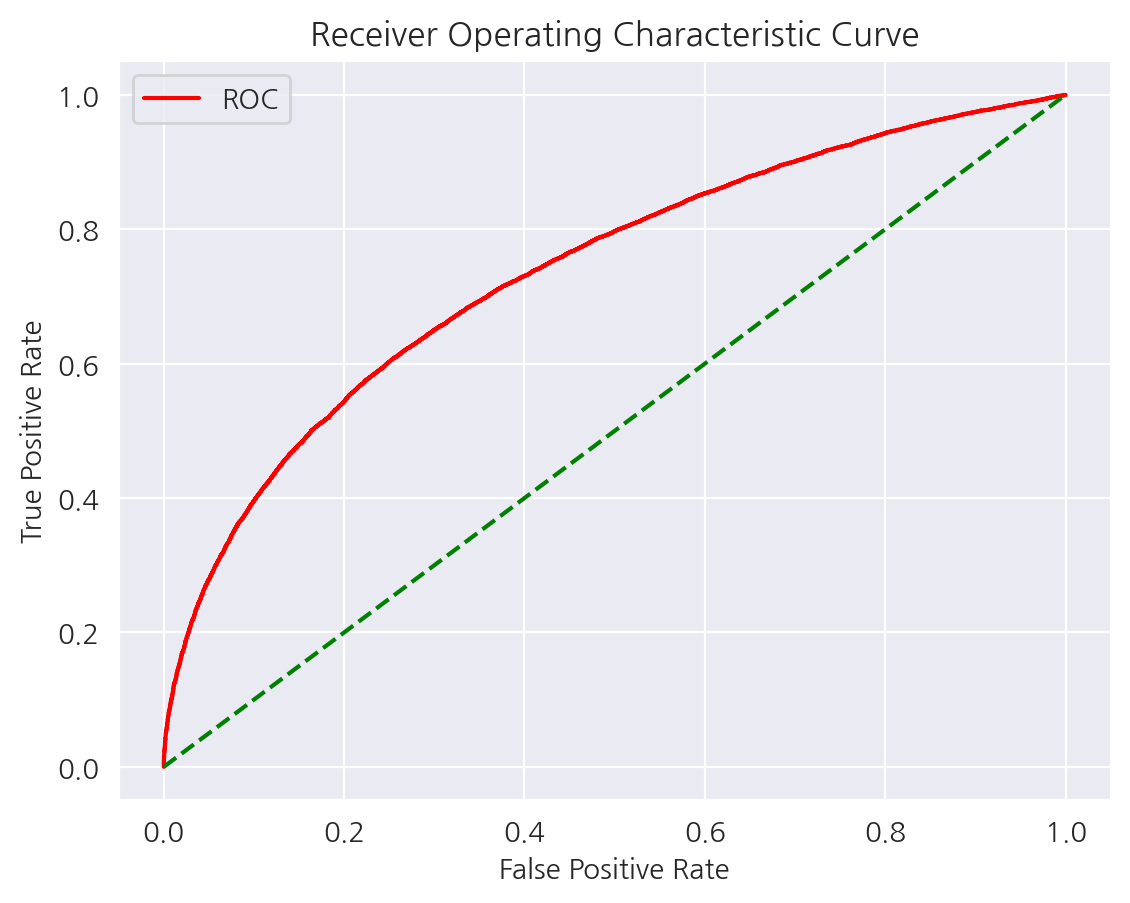

auc : 0.7365906822111608 


================================ MODEL 결과 ================================



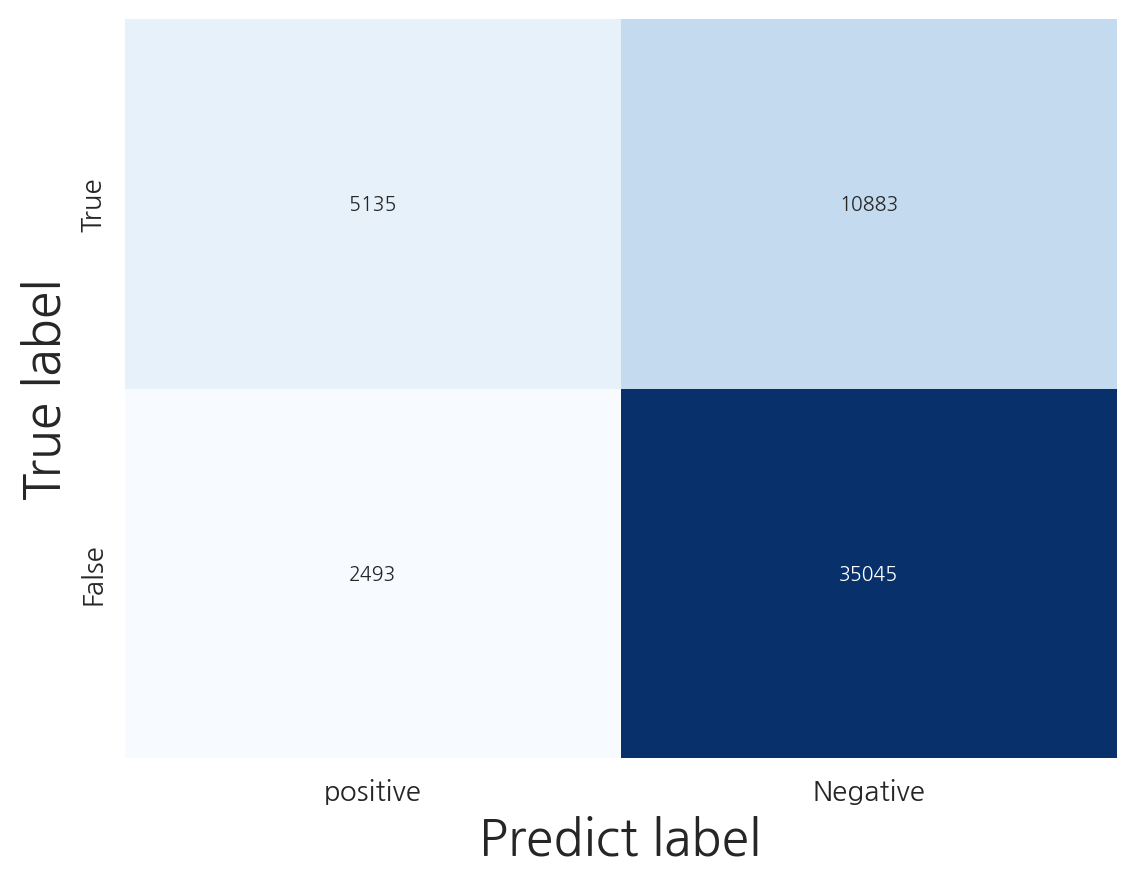

accuracy : 0.7502427365748002
precision : 0.6731777661248034
recall : 0.3205768510425771
f1-score : 0.718486486387311
Optimal threshold: 0.34372777913699404 
Optimal FPR: 0.25446214502637327 


================================ 최적 결과 ================================



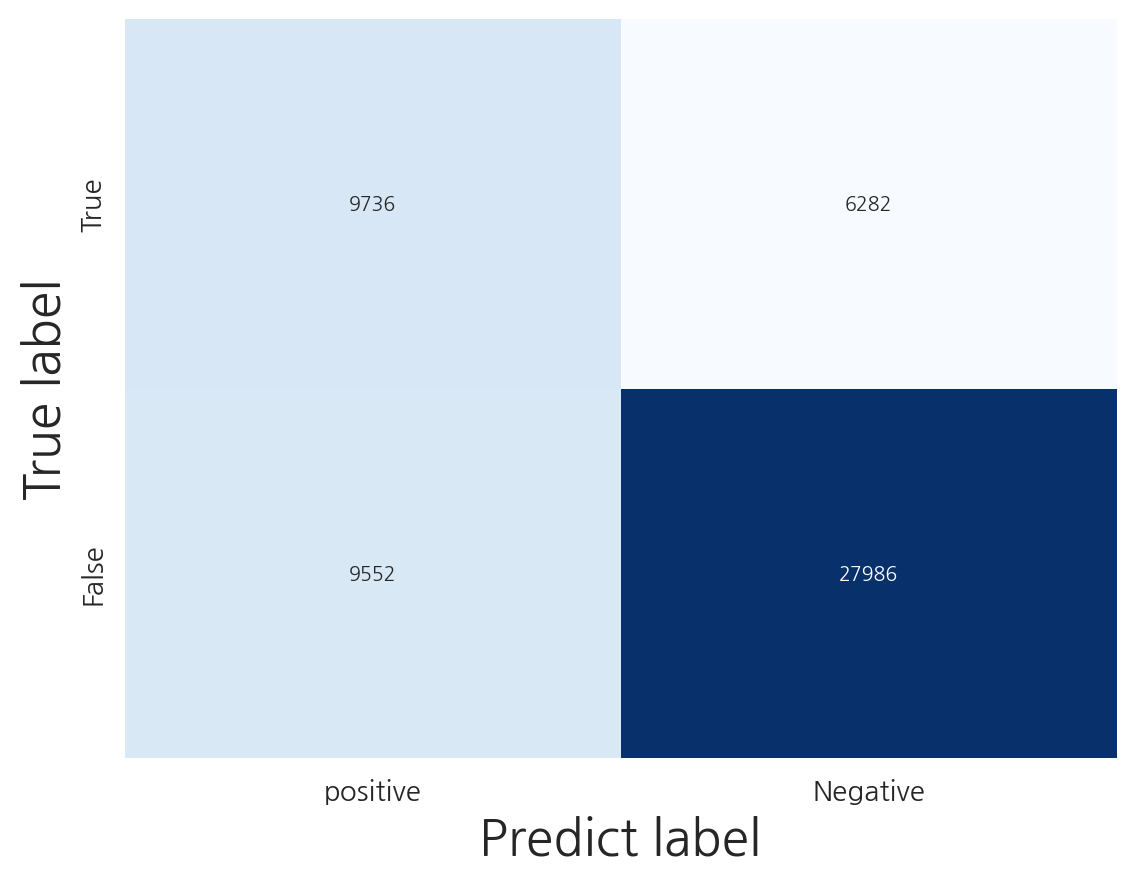

accuracy : 0.7043468518933453
precision : 0.504769805060141
recall : 0.6078162067673867
f1-score : 0.7113064454530318


LogisticRegression()

In [29]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

# model fit
# logistic_classifier(X_train, X_test, y_train, y_test)
logistic_visual(X_train, X_test, y_train, y_test)

Label Encoding

=============================  ROC CURVE  ====================================



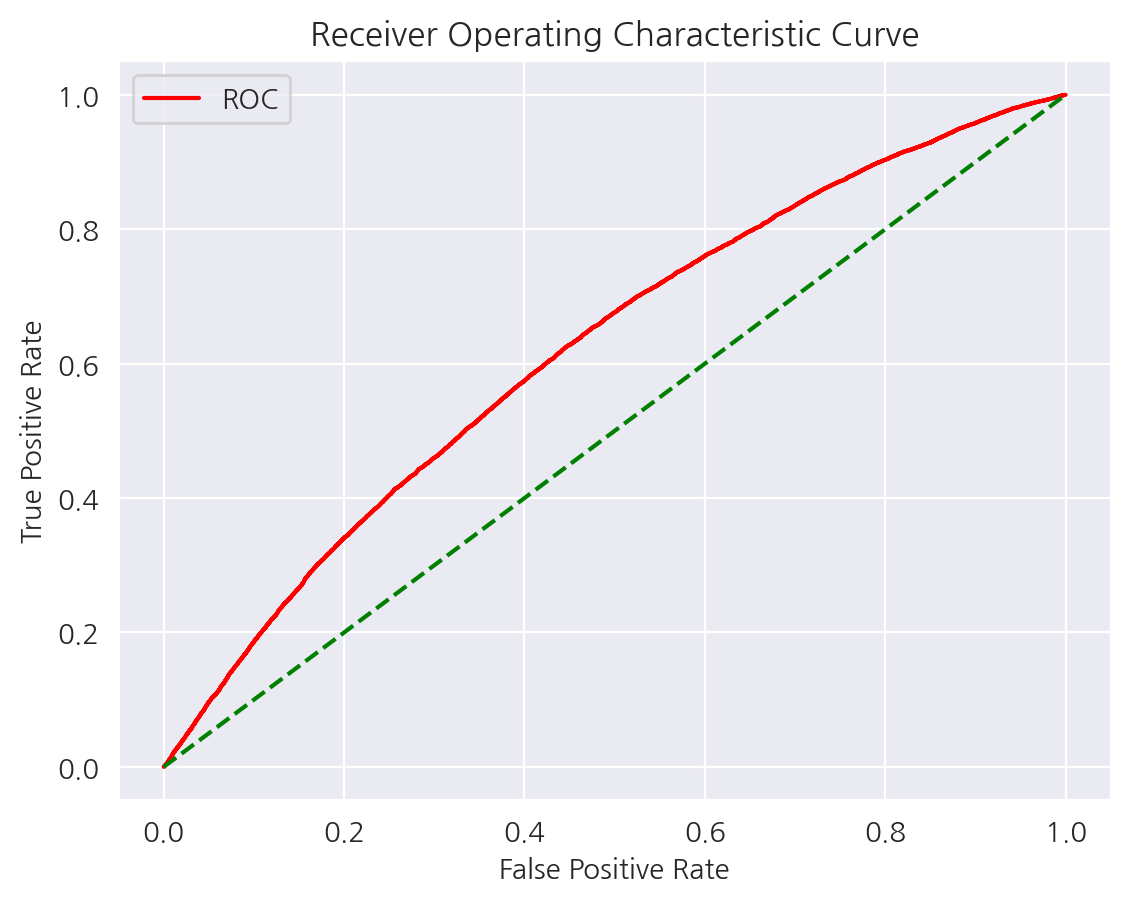

auc : 0.6207289453076195 


================================ MODEL 결과 ================================



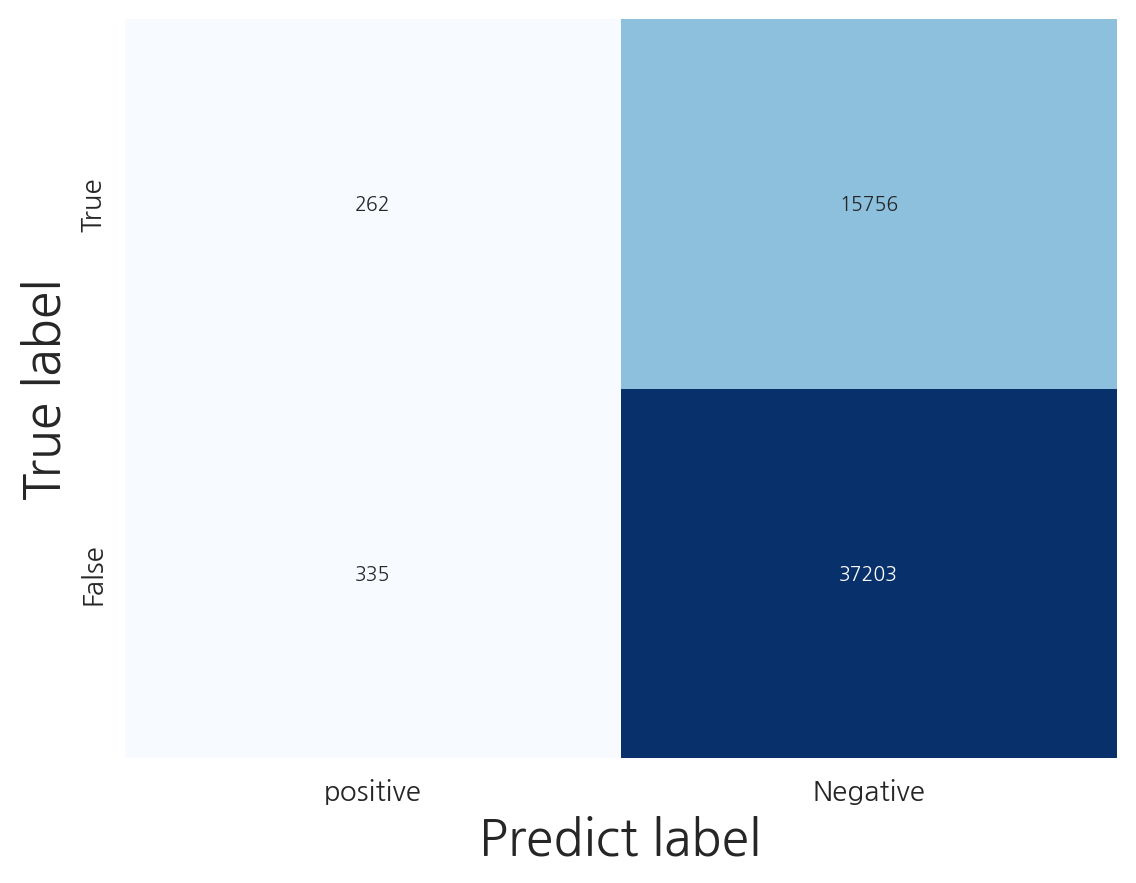

accuracy : 0.6995481365299873
precision : 0.4388609715242881
recall : 0.01635659882632039
f1-score : 0.5857168724292989
Optimal threshold: 0.2951589045781505 
Optimal FPR: 0.4478395226170814 


================================ 최적 결과 ================================



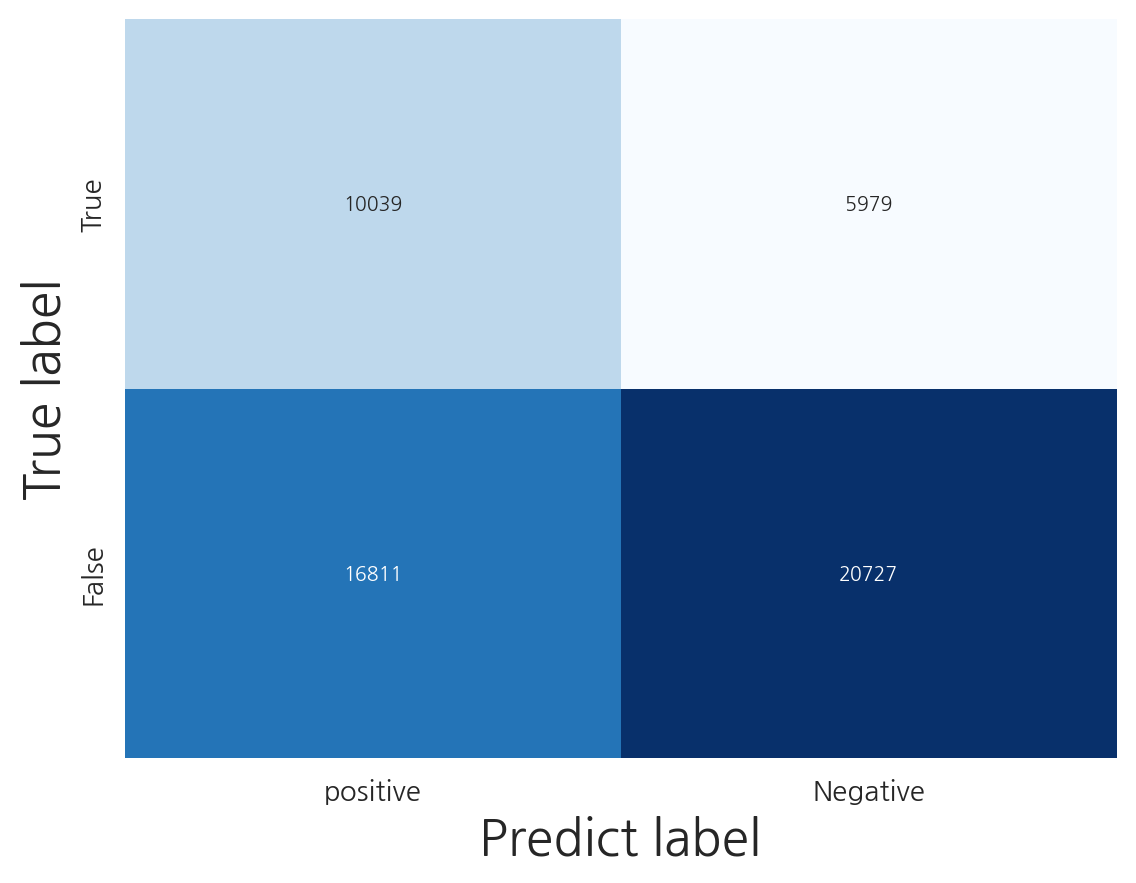

accuracy : 0.574464112331018
precision : 0.3738919925512104
recall : 0.6267324260207267
f1-score : 0.5923526769164171


LogisticRegression()

In [30]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_label_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

# model fit
# logistic_classifier(X_train, X_test, y_train, y_test)
logistic_visual(X_train, X_test, y_train, y_test)

수동 Label Encoding

=============================  ROC CURVE  ====================================



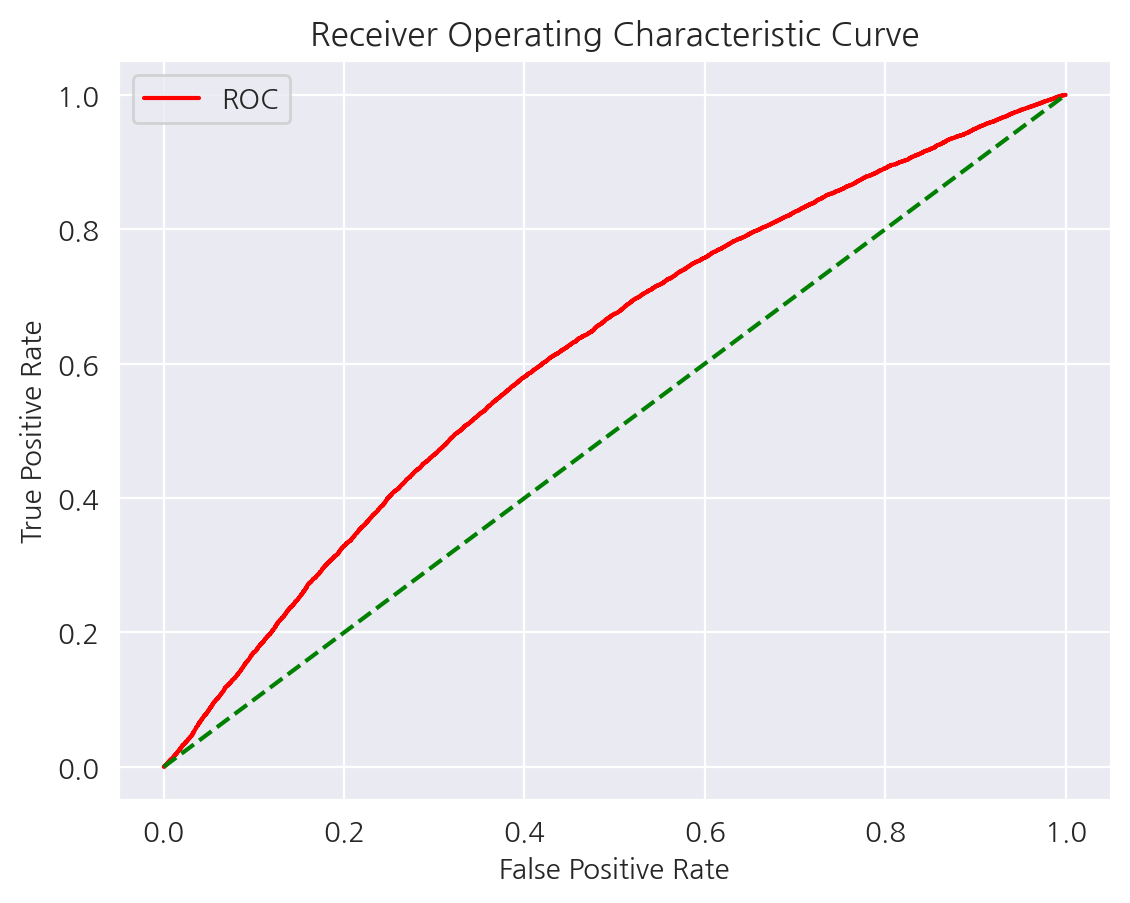

auc : 0.6150960209657044 


================================ MODEL 결과 ================================



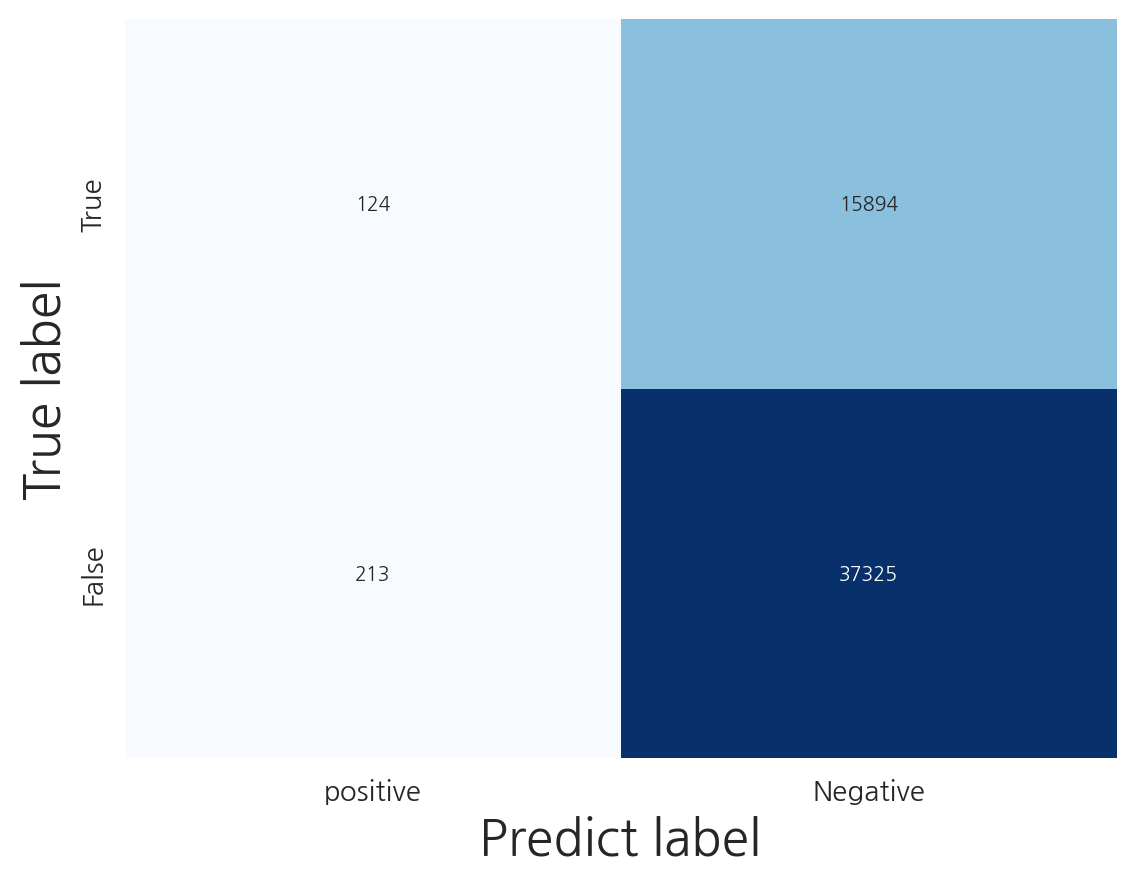

accuracy : 0.6992493838225409
precision : 0.36795252225519287
recall : 0.007741291047571482
f1-score : 0.5810529931729993
Optimal threshold: 0.3064136122875411 
Optimal FPR: 0.3961052799829506 


================================ 최적 결과 ================================



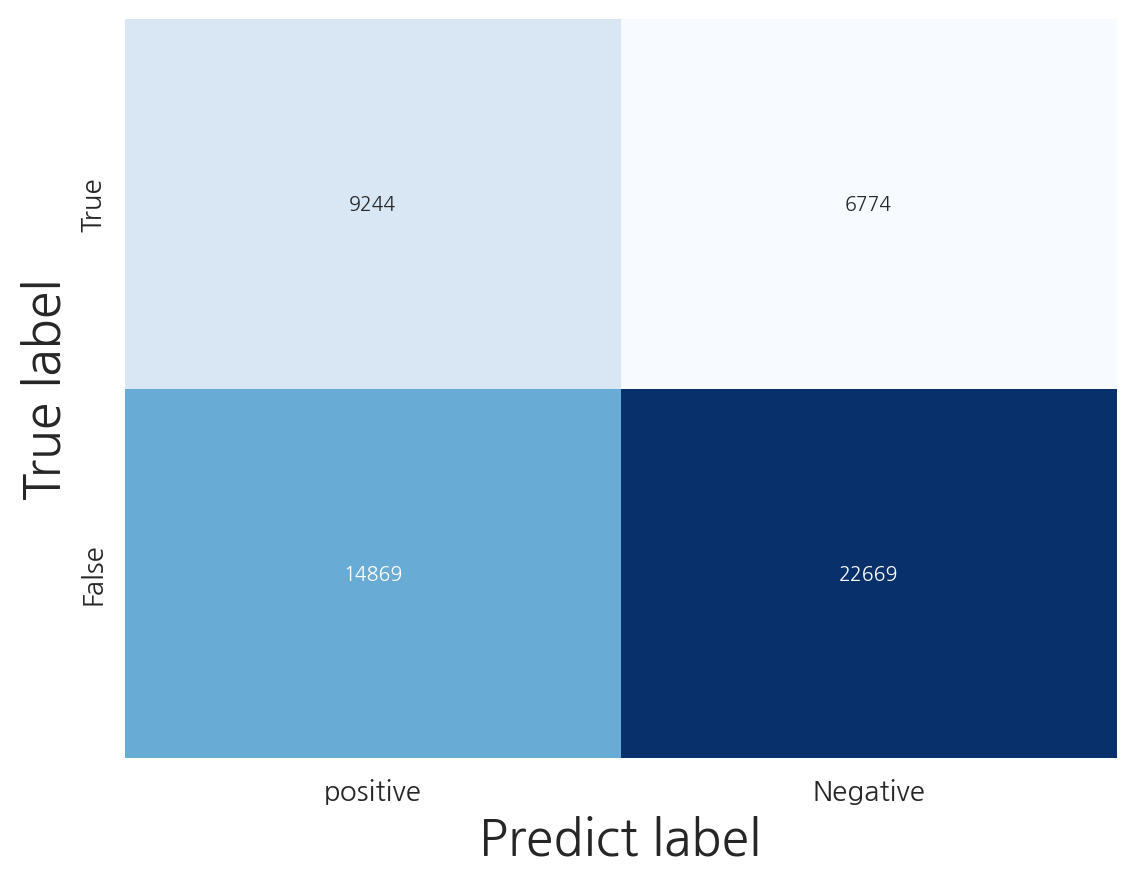

accuracy : 0.5958809470460826
precision : 0.3833616721270684
recall : 0.5771007616431515
f1-score : 0.612219322246324


LogisticRegression()

In [31]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

# model fit
# logistic_classifier(X_train, X_test, y_train, y_test)
logistic_visual(X_train, X_test, y_train, y_test)

#### Oversampling 후 Logistic Regression

One-Hot Encoding

In [32]:
# SMOTE를 사용한 oversampling
from imblearn.over_sampling import SMOTE, SMOTENC
from collections import Counter

# 1:1로 맞추면 같은 선 위에 존재하는 데이터가 많아짐, 0.8로 설정
smt = SMOTE(sampling_strategy = 0.6, random_state = 39)

====================== Data Oversampling ============================
Before :  Counter({0: 150149, 1: 64072})
After :  Counter({0: 150149, 1: 90089}) 


=============================  ROC CURVE  ====================================



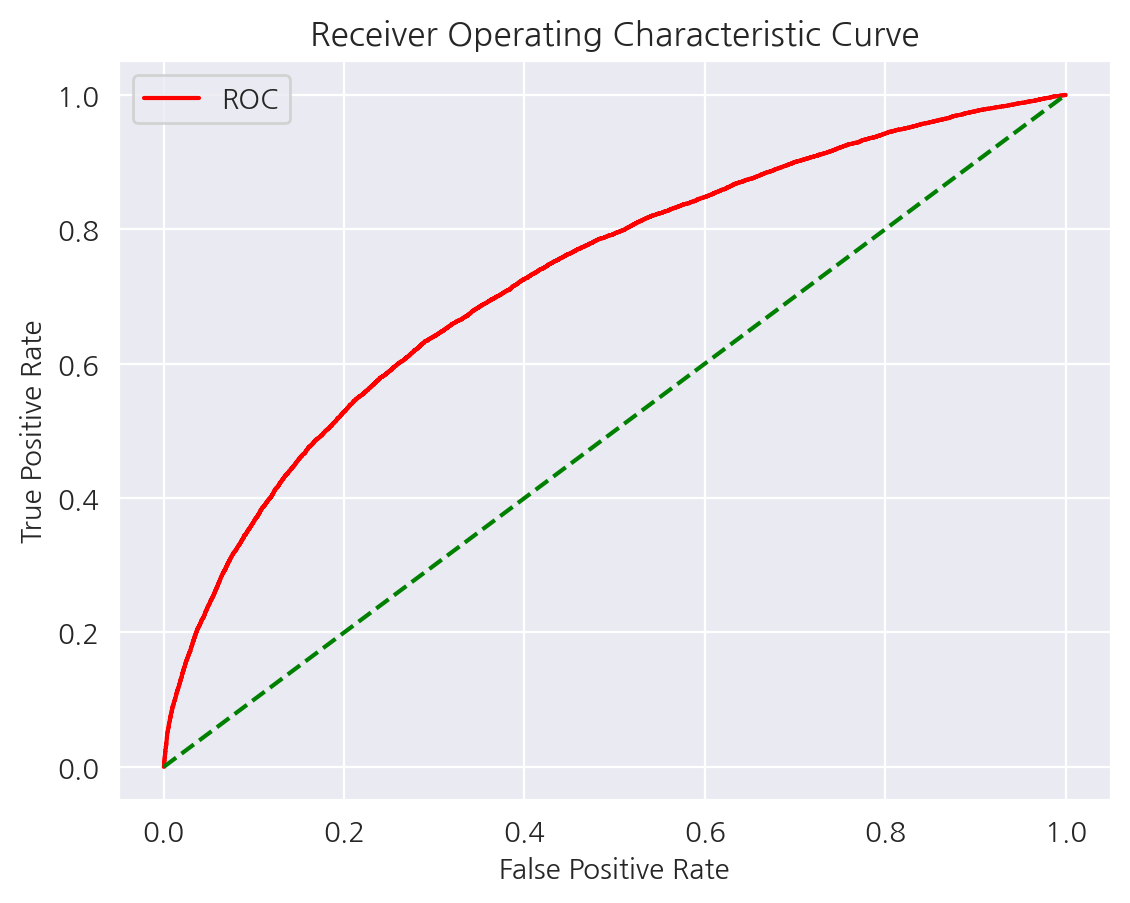

auc : 0.7281656107601948 


================================ MODEL 결과 ================================



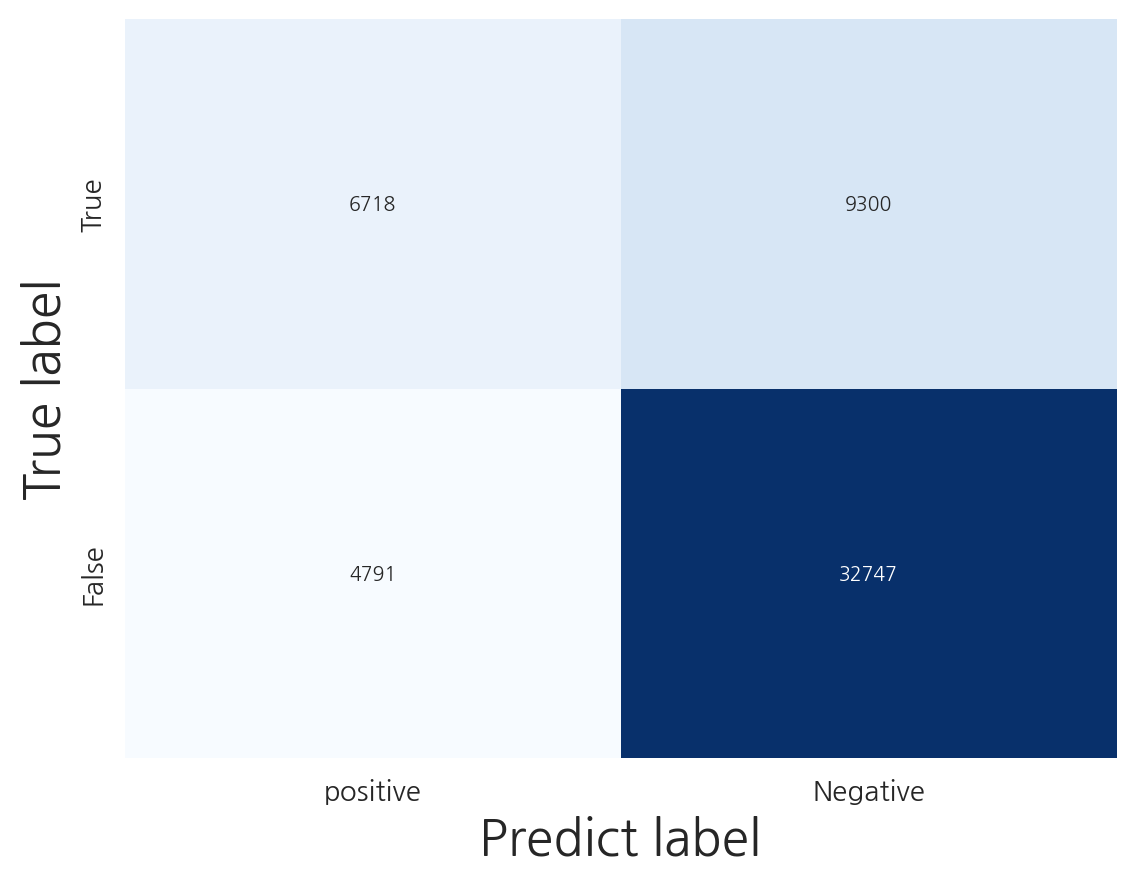

accuracy : 0.7368922249607887
precision : 0.5837170909722825
recall : 0.41940317143213884
f1-score : 0.72279669862784
Optimal threshold: 0.37522905844915794 
Optimal FPR: 0.2896265118013746 


================================ 최적 결과 ================================



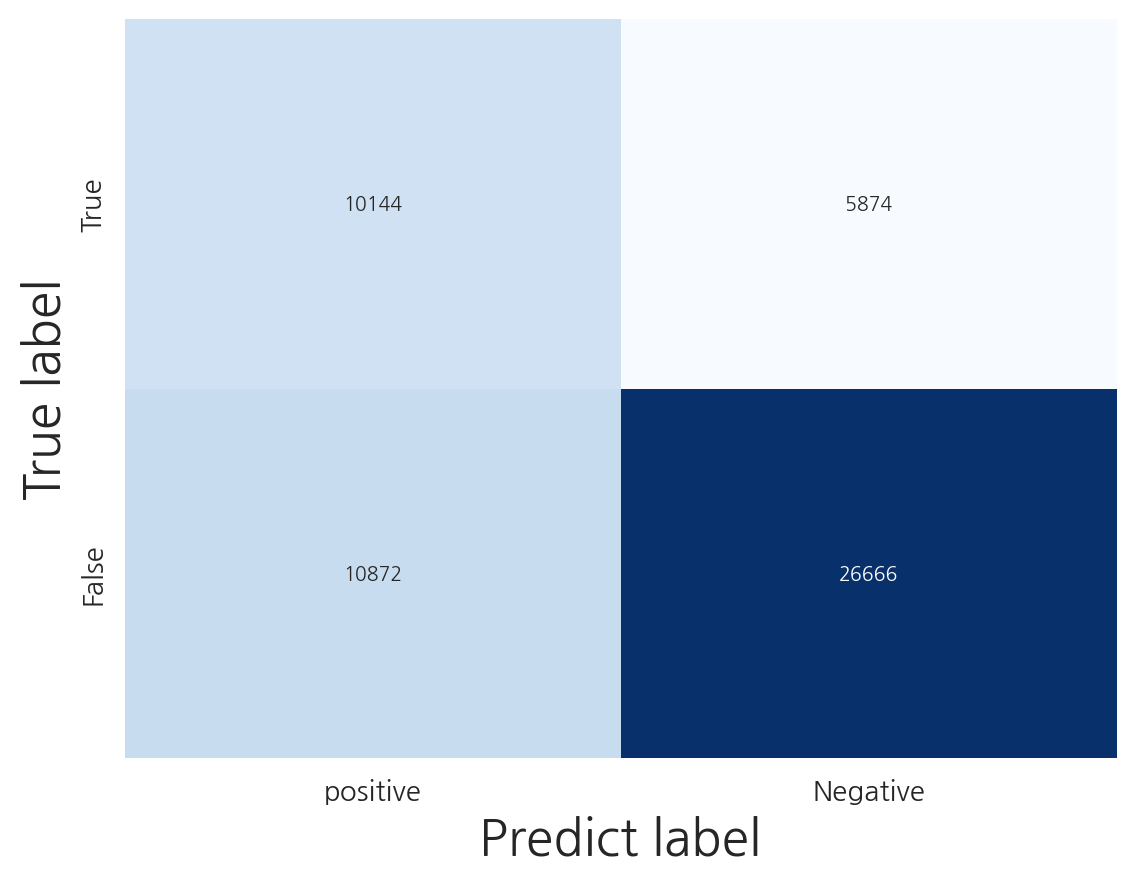

accuracy : 0.6873179475688999
precision : 0.48267986296155313
recall : 0.6332875515045574
f1-score : 0.6972669492129857


LogisticRegression()

In [33]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

counter = Counter(y_train)
print("====================== Data Oversampling ============================")
print('Before : ', counter)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After : ", counter, "\n\n")

# model fit
# logistic_classifier(X_train_sm, X_test, y_train_sm, y_test)
logistic_visual(X_train_sm, X_test, y_train_sm, y_test)

Label Encoding

====================== Data Oversampling ============================
Before :  Counter({0: 150149, 1: 64072})
After :  Counter({0: 150149, 1: 90089}) 


=============================  ROC CURVE  ====================================



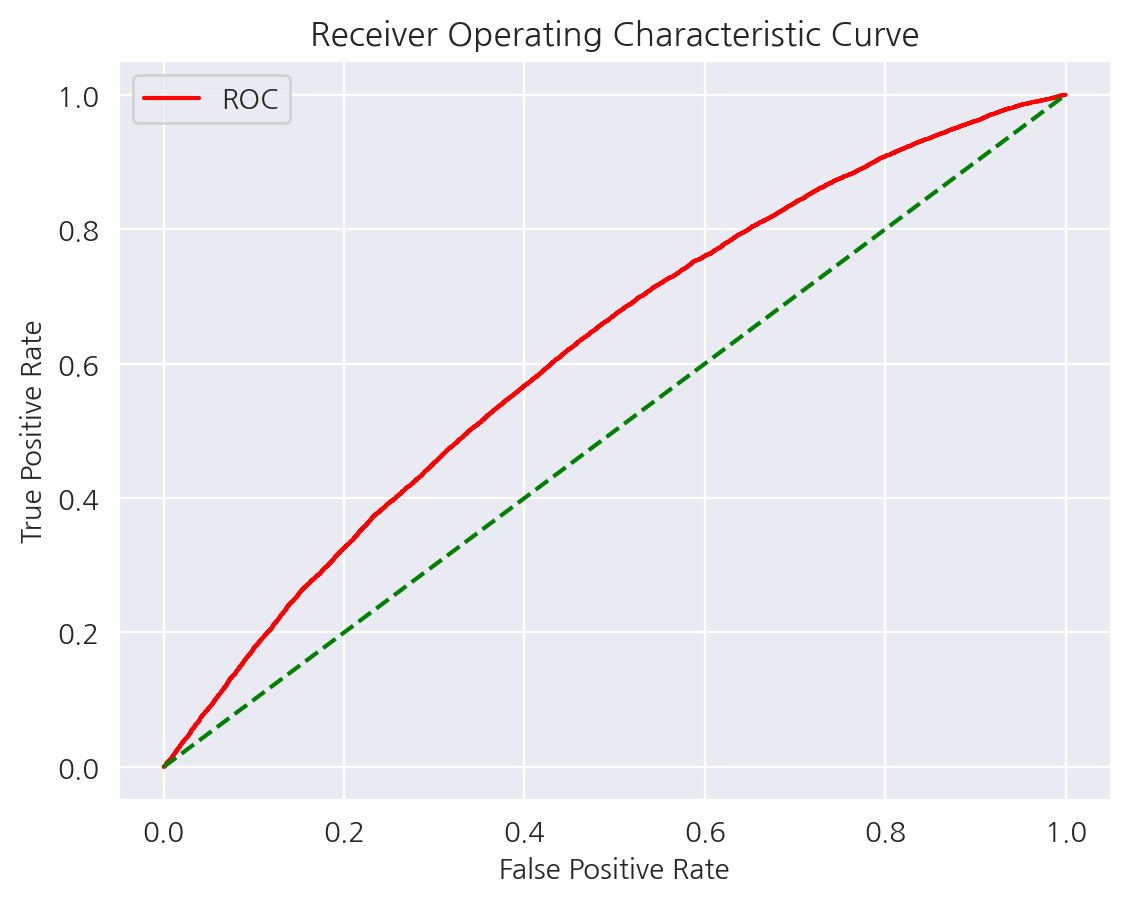

auc : 0.6177474624440333 


================================ MODEL 결과 ================================



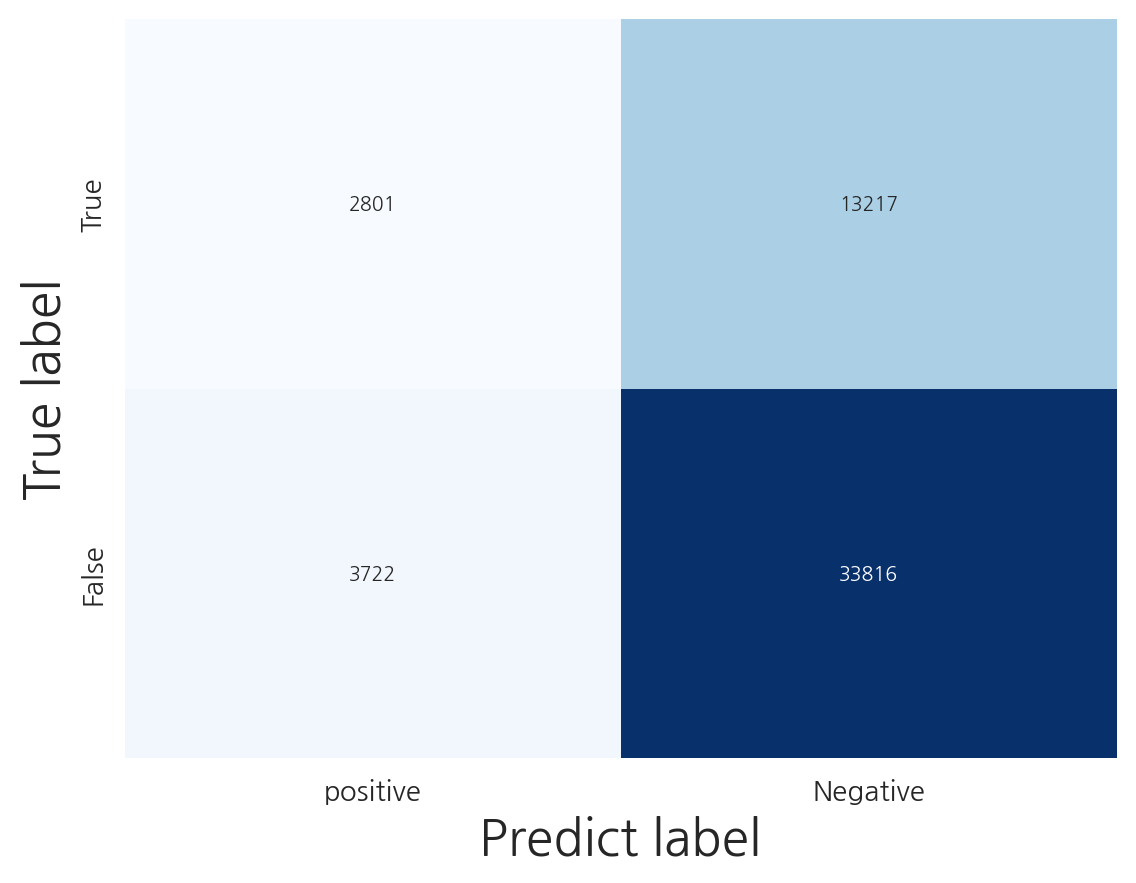

accuracy : 0.6837142430353275
precision : 0.42940364862793196
recall : 0.17486577600199776
f1-score : 0.6348544362976032
Optimal threshold: 0.35830780579954324 
Optimal FPR: 0.4813522297405296 


================================ 최적 결과 ================================



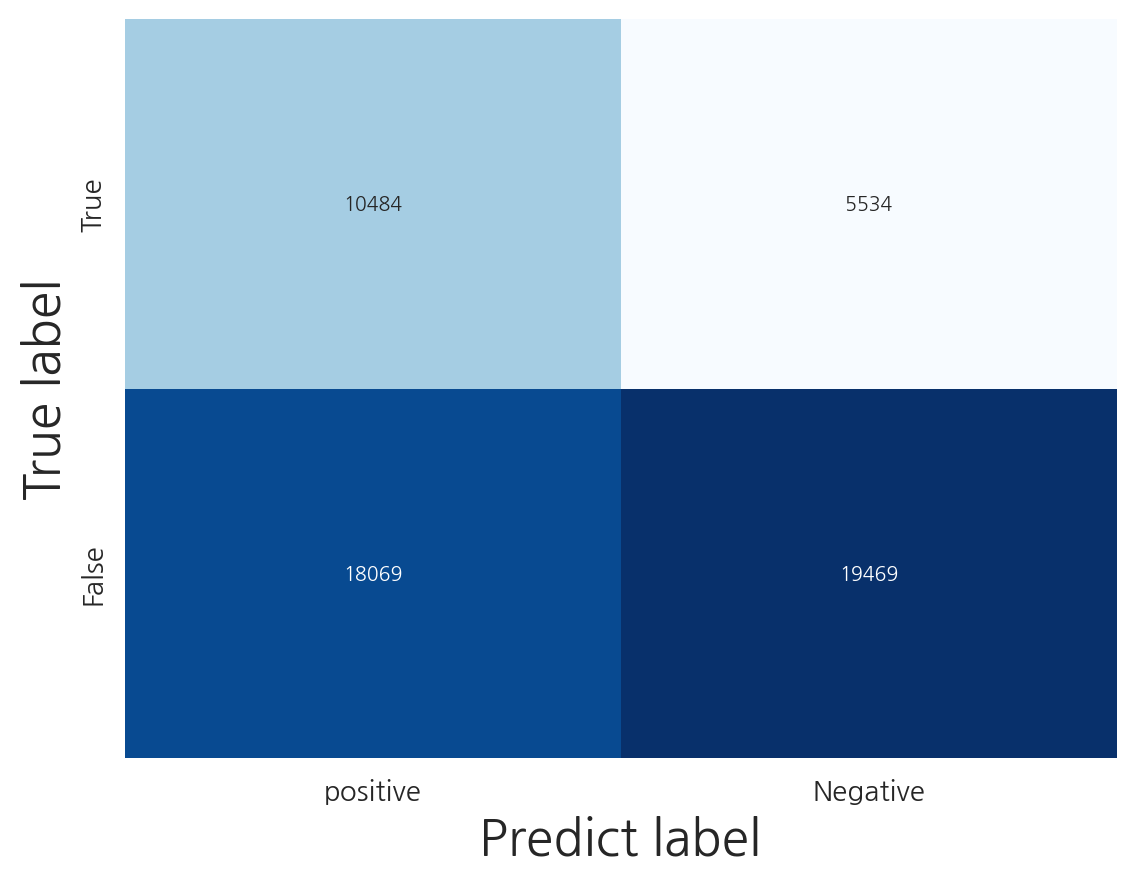

accuracy : 0.5592837403838973
precision : 0.3671768290547403
recall : 0.6545136721188662
f1-score : 0.5770904753211713


LogisticRegression()

In [34]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_label_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

counter = Counter(y_train)
print("====================== Data Oversampling ============================")
print('Before : ', counter)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After : ", counter, "\n\n")

# model fit
# logistic_classifier(X_train_sm, X_test, y_train_sm, y_test)
logistic_visual(X_train_sm, X_test, y_train_sm, y_test)

수동 Label Encoding

====================== Data Oversampling ============================
Before :  Counter({0: 150149, 1: 64072})
After :  Counter({0: 150149, 1: 90089}) 


=============================  ROC CURVE  ====================================



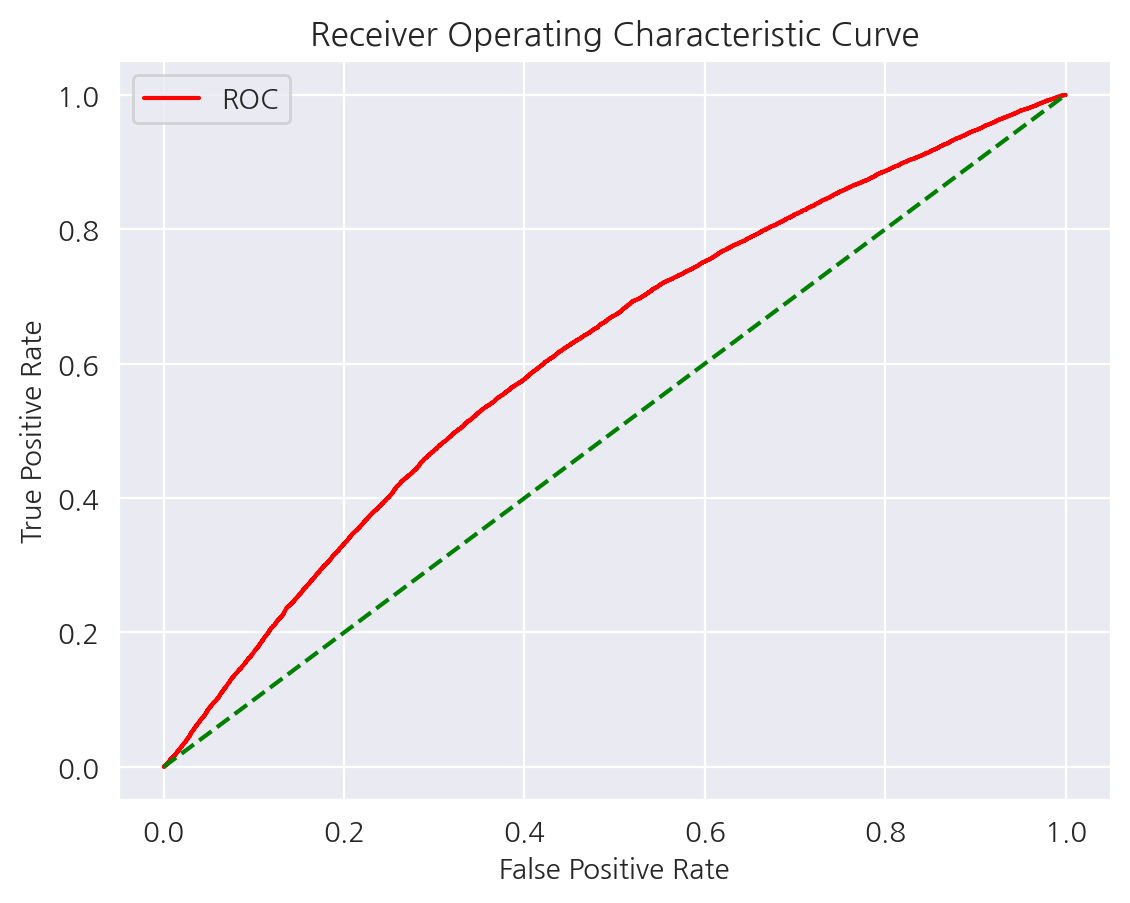

auc : 0.6144612764845953 


================================ MODEL 결과 ================================



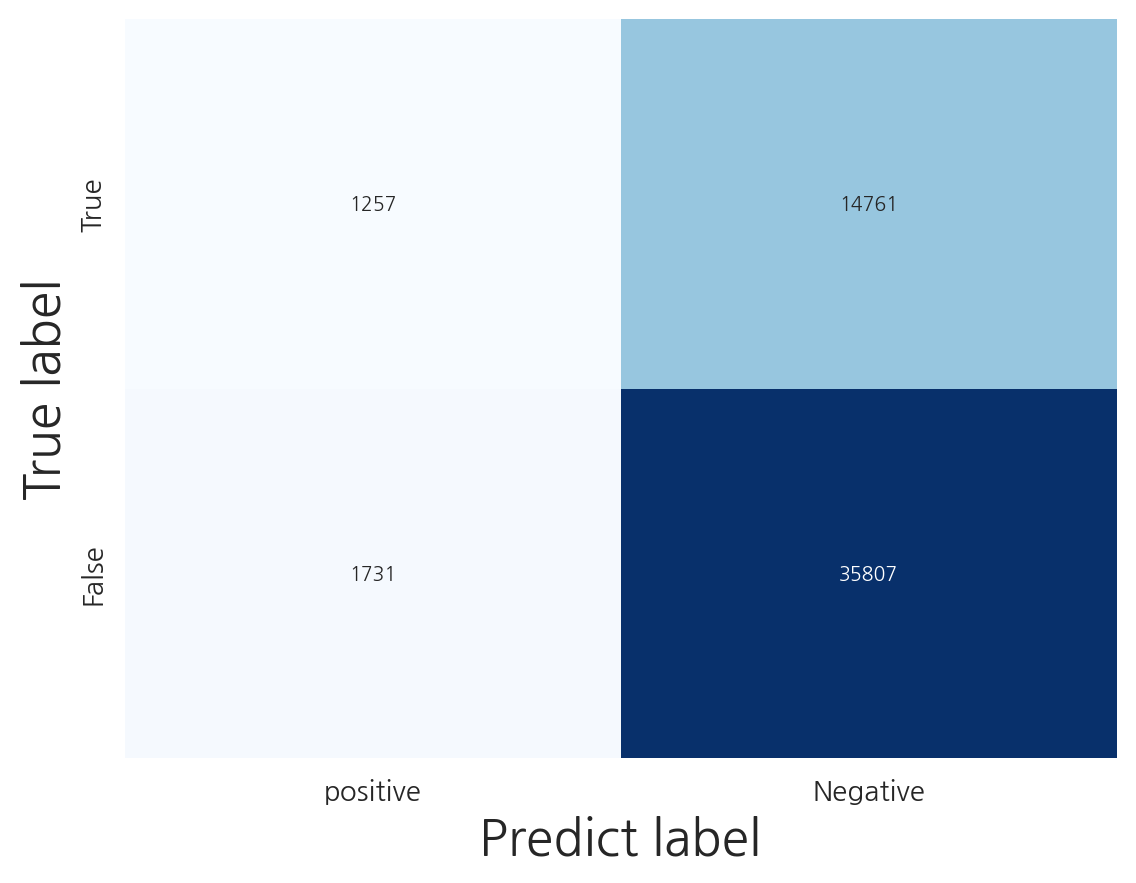

accuracy : 0.6920606467996117
precision : 0.4206827309236948
recall : 0.07847421650643027
f1-score : 0.6092737791205096
Optimal threshold: 0.37950105389049316 
Optimal FPR: 0.42303798817198573 


================================ 최적 결과 ================================



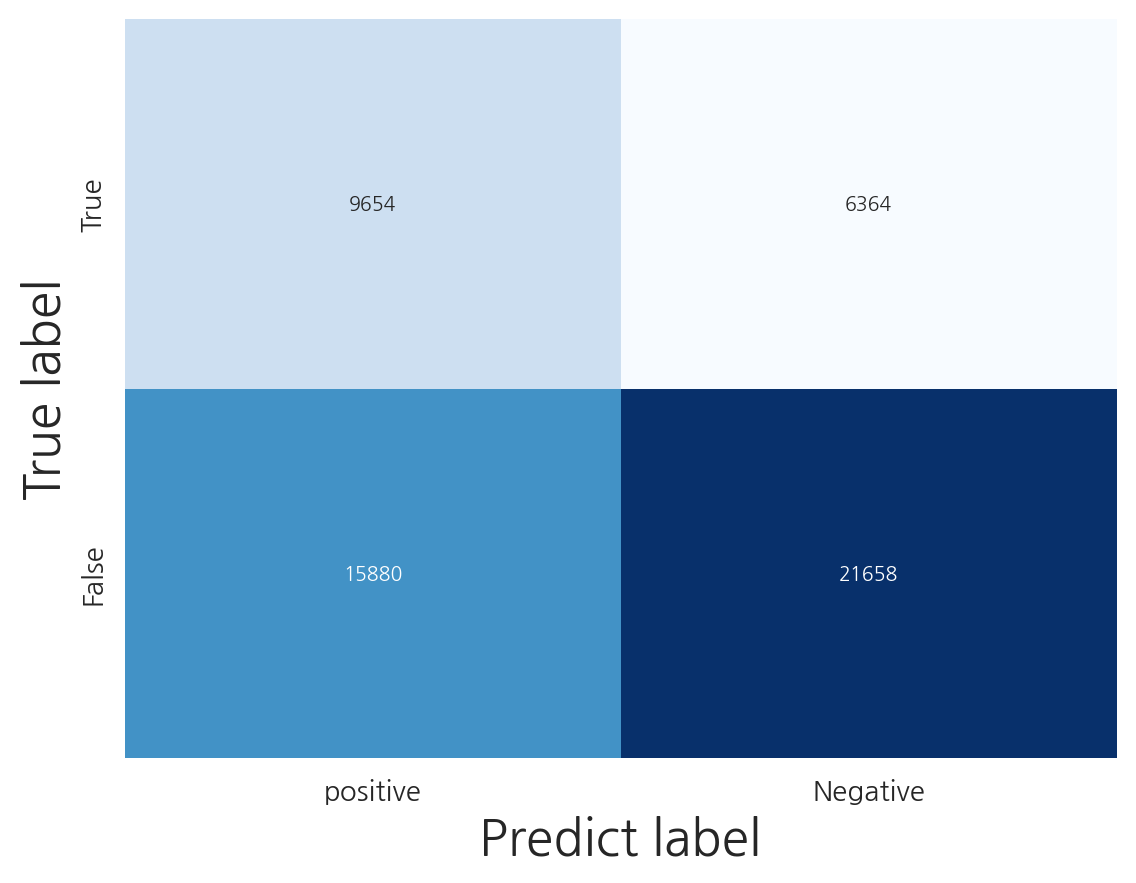

accuracy : 0.5846590484726267
precision : 0.3780841231299444
recall : 0.6026969659133475
f1-score : 0.6020752842897


LogisticRegression()

In [35]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

counter = Counter(y_train)
print("====================== Data Oversampling ============================")
print('Before : ', counter)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After : ", counter, "\n\n")

# model fit
# logistic_classifier(X_train_sm, X_test, y_train_sm, y_test)
logistic_visual(X_train_sm, X_test, y_train_sm, y_test)

###One-hot

thres 0.5일 때  
accuracy : 0.75
precision : 0.67
recall : 0.32
f1-score : 0.71

onehot 최적 결과

Optimal threshold: 0.34
Optimal FPR: 0.25

accuracy : 0.70
precision : 0.50
recall : 0.60
f1-score : 0.71

onehot oversampling 후 thres 0.5일 때

accuracy : 0.73
precision : 0.58
recall : 0.41
f1-score : 0.72

oversampling 후 최적 결과

Optimal threshold: 0.37
Optimal FPR: 0.28

accuracy : 0.68
precision : 0.48
recall : 0.63
f1-score : 0.69


### Label

thres 0.5일 때

accuracy : 0.69
precision : 0.43
recall : 0.016
f1-score : 0.58

label 최적 결과

Optimal threshold: 0.29
Optimal FPR: 0.44

accuracy : 0.57
precision : 0.37
recall : 0.62
f1-score : 0.59

label oversampling 후

accuracy : 0.63
precision : 0.39
recall : 0.40
f1-score : 0.63

oversampling 후 최적 결과

Optimal threshold: 0.41
Optimal FPR: 0.49

accuracy : 0.55
precision : 0.36
recall : 0.65
f1-score : 0.57

### handled label

thres 0.5일 때

accuracy : 0.69
precision : 0.36
recall : 0.007
f1-score : 0.58

최적 결과

Optimal threshold: 0.30
Optimal FPR: 0.39

accuracy : 0.59
precision : 0.38
recall : 0.57
f1-score : 0.61

handled label oversampling 후

accuracy : 0.65
precision : 0.41
recall : 0.34
f1-score : 0.64

oversampling 후 최적 결과

Optimal threshold: 0.46
Optimal FPR: 0.36

accuracy : 0.58
precision : 0.37
recall : 0.60
f1-score : 0.60